# Wine Quality Prediction

# Importing libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

# Importing Datasets

In [5]:
df=pd.read_csv("winequality-red.csv")

# identifying shape of the datset

In [7]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [8]:
df.shape

(1599, 12)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [10]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# Checking null values in the dataset

In [12]:
df.isnull().sum()


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [13]:
df.groupby('quality').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


 # histogram to visualise the distribution of the data with continuous values in the columns of the dataset.

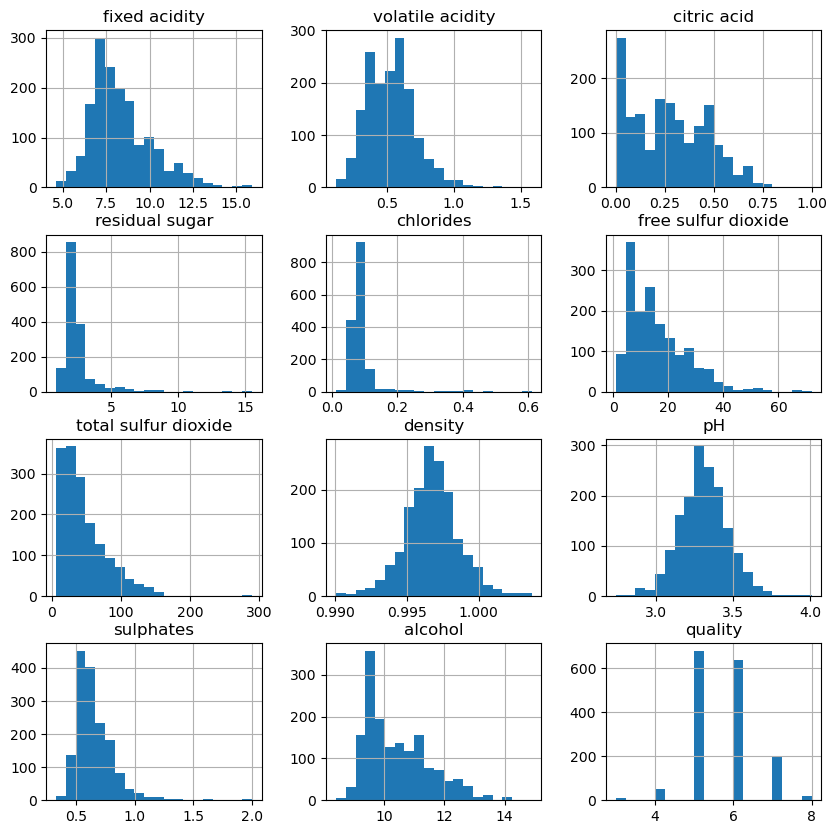

In [15]:
df.hist(bins=20, figsize=(10, 10))
plt.show()


# count plot to visualise the number data for each quality of wine.

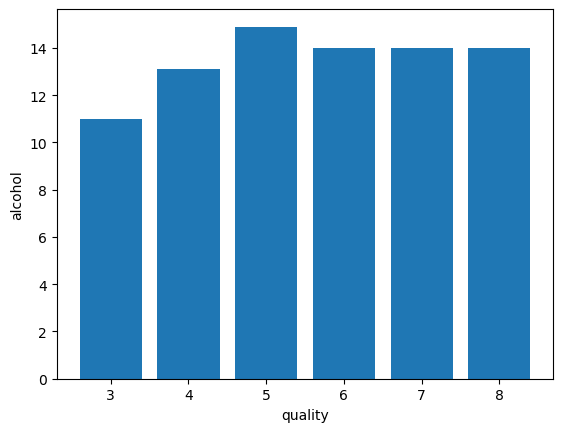

In [17]:
plt.bar(df['quality'], df['alcohol'])
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.show()


# Correlation

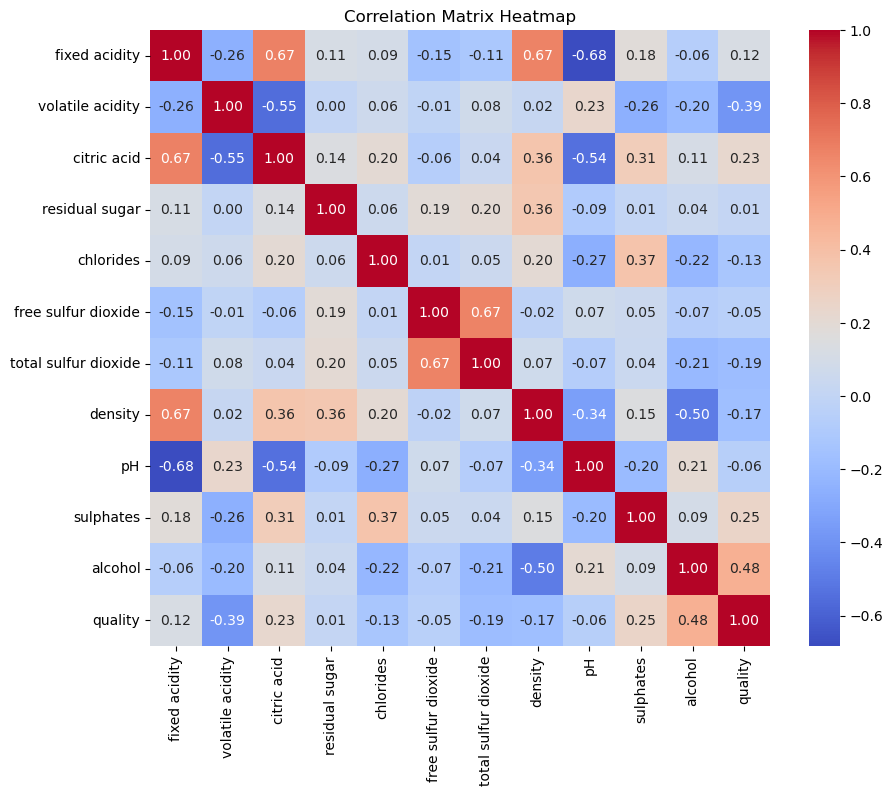

In [19]:
correlation_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


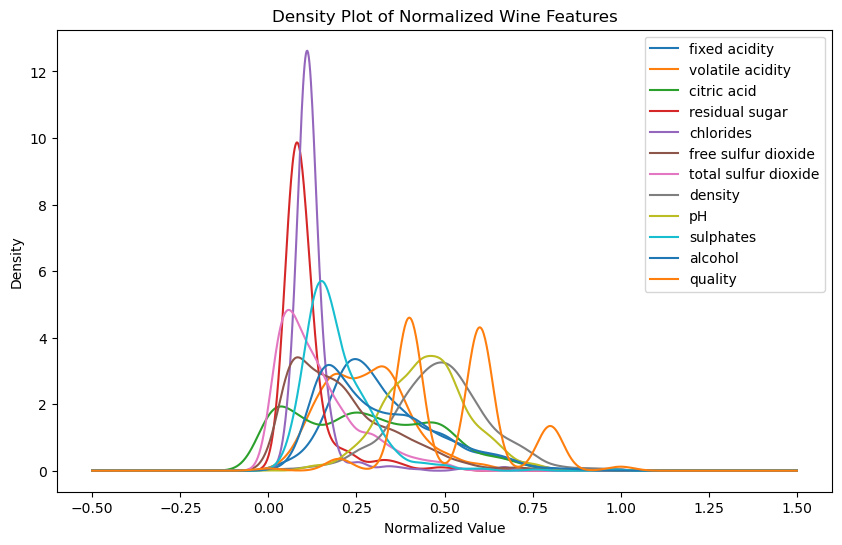

In [20]:

# Normalizing  the data to scale all features between 0 and 1
scaler = MinMaxScaler()
normalized_data = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Plot density of normalized data
plt.figure(figsize=(10, 6))

for column in normalized_data.columns:
    normalized_data[column].plot(kind='density', label=column)

plt.legend()  # Add legend to identify features
plt.title('Density Plot of Normalized Wine Features')
plt.xlabel('Normalized Value')
plt.ylabel('Density')
plt.show()


In [21]:
# Create Classification version of target variable
df['goodquality'] = [1 if x >= 5 else 0 for x in df['quality']]# Separate feature variables and target variable
X = df.drop(['quality','goodquality'], axis = 1)
Y = df['goodquality']

In [22]:
df['goodquality'].value_counts()

goodquality
1    1536
0      63
Name: count, dtype: int64

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=7)

# Logistic Regression Model




In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)

print("Accuracy Score:",accuracy_score(Y_test,Y_pred))

Accuracy Score: 0.9520833333333333


# K-Nearest Neighbors (KNN) 


In [27]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)

print("Accuracy Score:",accuracy_score(Y_test,y_pred))

Accuracy Score: 0.9541666666666667


# Decision Tree Model


In [29]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy',random_state=7)
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred))

Accuracy Score: 0.9270833333333334


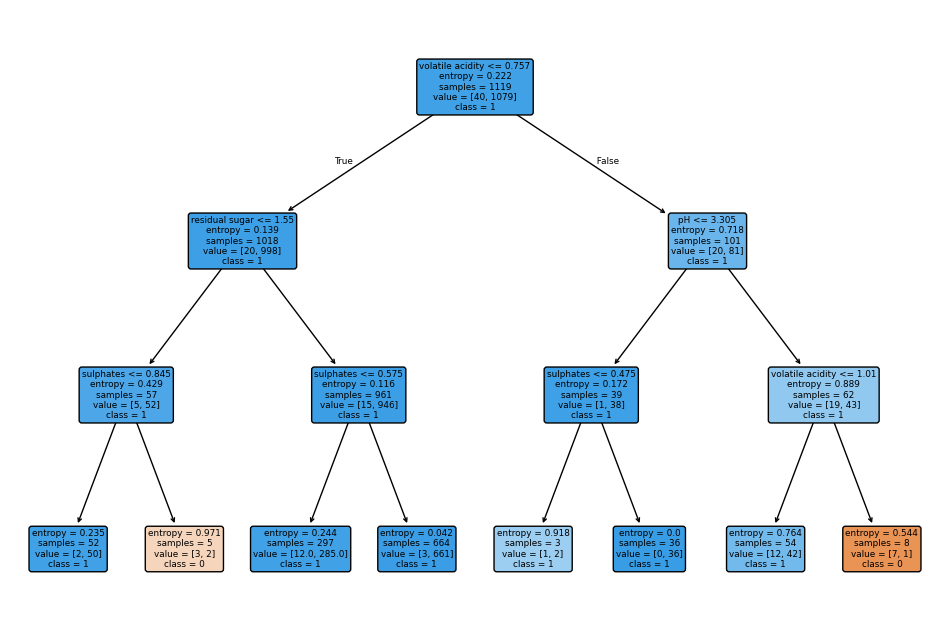

In [63]:
model = DecisionTreeClassifier(criterion='entropy', random_state=7, max_depth=3)
model.fit(X_train, Y_train)

# Visualize the pruned decision tree
plt.figure(figsize=(12, 8))  # Adjust the size for clarity
plot_tree(model, filled=True, feature_names=X_train.columns, class_names=[str(c) for c in model.classes_], rounded=True)
plt.show()

# Random Forest Model

In [31]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(random_state=1)
model2.fit(X_train, Y_train)
y_pred2 = model2.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred2))

Accuracy Score: 0.95


In [32]:
f1_scores = {
    "Logistic Regression": 0.87,
    "Random Forest": 0.89,
    "Decision Tree": 0.85,
    "K-Nearest Neighbors": 0.86
}

# Find the best model based on F1-score
best_model_f1 = max(f1_scores, key=f1_scores.get)
print(f"The Best Model based on F1-Score is '{best_model_f1}' with an F1-Score of {f1_scores[best_model_f1]:.2f}")


The Best Model based on F1-Score is 'Random Forest' with an F1-Score of 0.89


In [33]:
import pickle

clf = RandomForestClassifier()
clf.fit(X, Y)

with open('wine_quality_model.pkl', 'wb') as f:
    pickle.dump(clf, f)

In [ ]:
import os
import subprocess

# Define the path to the Streamlit app
streamlit_app_path = r"C:\Users\saipr\OneDrive\Desktop\SAIPRANEETH S\Wine Quality prediction\app.py"  # Replace with the correct path to your app.py file

# Run Streamlit app in the background
subprocess.run(["streamlit", "run", streamlit_app_path])
